<a href="https://colab.research.google.com/github/helonayala/sysid/blob/main/ball_and_beam_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read ball and beam data

below we have a couple of code to read data for the ball and beam case study

more details in: [https://www.tecquipment.com/ball-and-beam-apparatus](https://www.tecquipment.com/ball-and-beam-apparatus)

the data is recorded in open loop, whenever the beam reached a certain threshold, it would change the sign of the step, which increases its amplitude after running 3 cycles of positive/negative inputs

more data will be added below for training and testing models

new datasets to come: in closed loop with general purpose signals as reference such as the multi-sine, randomly generated step signals, etc.


# Imports and functions

In [18]:
import os
import scipy.io
import numpy as np

def read_mat_data(file_url, file_id):
    """
    Downloads a .mat file from a given URL, loads it, and extracts 'u' and 'y' variables.

    Args:
        file_url (str): The URL of the .mat file to download.
        file_id (str): An identifier for the file (e.g., '1', '2', '3') for printing messages.

    Returns:
        tuple: A tuple containing flattened numpy arrays (u, y). Returns (empty_array, empty_array) on error.
    """
    local_filename = os.path.basename(file_url)

    print(f"Downloading {file_url} as {local_filename}...")
    get_ipython().system(f"rm -f {local_filename}") # Remove if exists to ensure fresh download
    get_ipython().system(f"wget -q -O {local_filename} '{file_url}'")

    u_data = np.array([])
    y_data = np.array([])

    if not os.path.exists(local_filename):
        print(f"Error: File '{local_filename}' not found after attempting download. Please check the URL and wget command.")
    else:
        print(f"File '{local_filename}' downloaded successfully.")
        try:
            print(f"Loading data from '{local_filename}' using scipy.io.loadmat...")
            mat_data = scipy.io.loadmat(local_filename)
            print("File loaded. Extracting variables u and y...")

            if 'u' in mat_data and 'y' in mat_data:
                u_data = mat_data['u'].flatten()
                y_data = mat_data['y'].flatten()
                print(f"u{file_id} and y{file_id} extracted successfully.")
            else:
                print(f"Error: 'u' or 'y' not found in '{local_filename}'.")

        except FileNotFoundError:
            print(f"Error: Could not find '{local_filename}' to load. Ensure download was successful.")
        except Exception as e:
            print(f"An unexpected error occurred during data extraction: {e}")
    return u_data, y_data


# Download and Load Data


In [19]:
file_url_1 = 'https://github.com/helonayala/sysid/raw/refs/heads/main/data/increasing_steps_uy.mat'
u1, y1 = read_mat_data(file_url_1, '1')

File 'increasing_steps_uy.mat' downloaded successfully.
Loading data from 'increasing_steps_uy.mat' using scipy.io.loadmat...
File loaded. Extracting variables u and y...
u1 and y1 extracted successfully.


In [20]:
file_url_2 = 'https://github.com/helonayala/sysid/raw/refs/heads/main/data/multisin_beam_uy.mat'
u2, y2 = read_mat_data(file_url_2, '2')

File 'multisin_beam_uy.mat' downloaded successfully.
Loading data from 'multisin_beam_uy.mat' using scipy.io.loadmat...
File loaded. Extracting variables u and y...
u2 and y2 extracted successfully.


In [21]:
file_url_3 = 'https://github.com/helonayala/sysid/raw/refs/heads/main/data/random_steps_uy.mat'
u3, y3 = read_mat_data(file_url_3, '3')

File 'random_steps_uy.mat' downloaded successfully.
Loading data from 'random_steps_uy.mat' using scipy.io.loadmat...
File loaded. Extracting variables u and y...
u3 and y3 extracted successfully.


# Plot all data

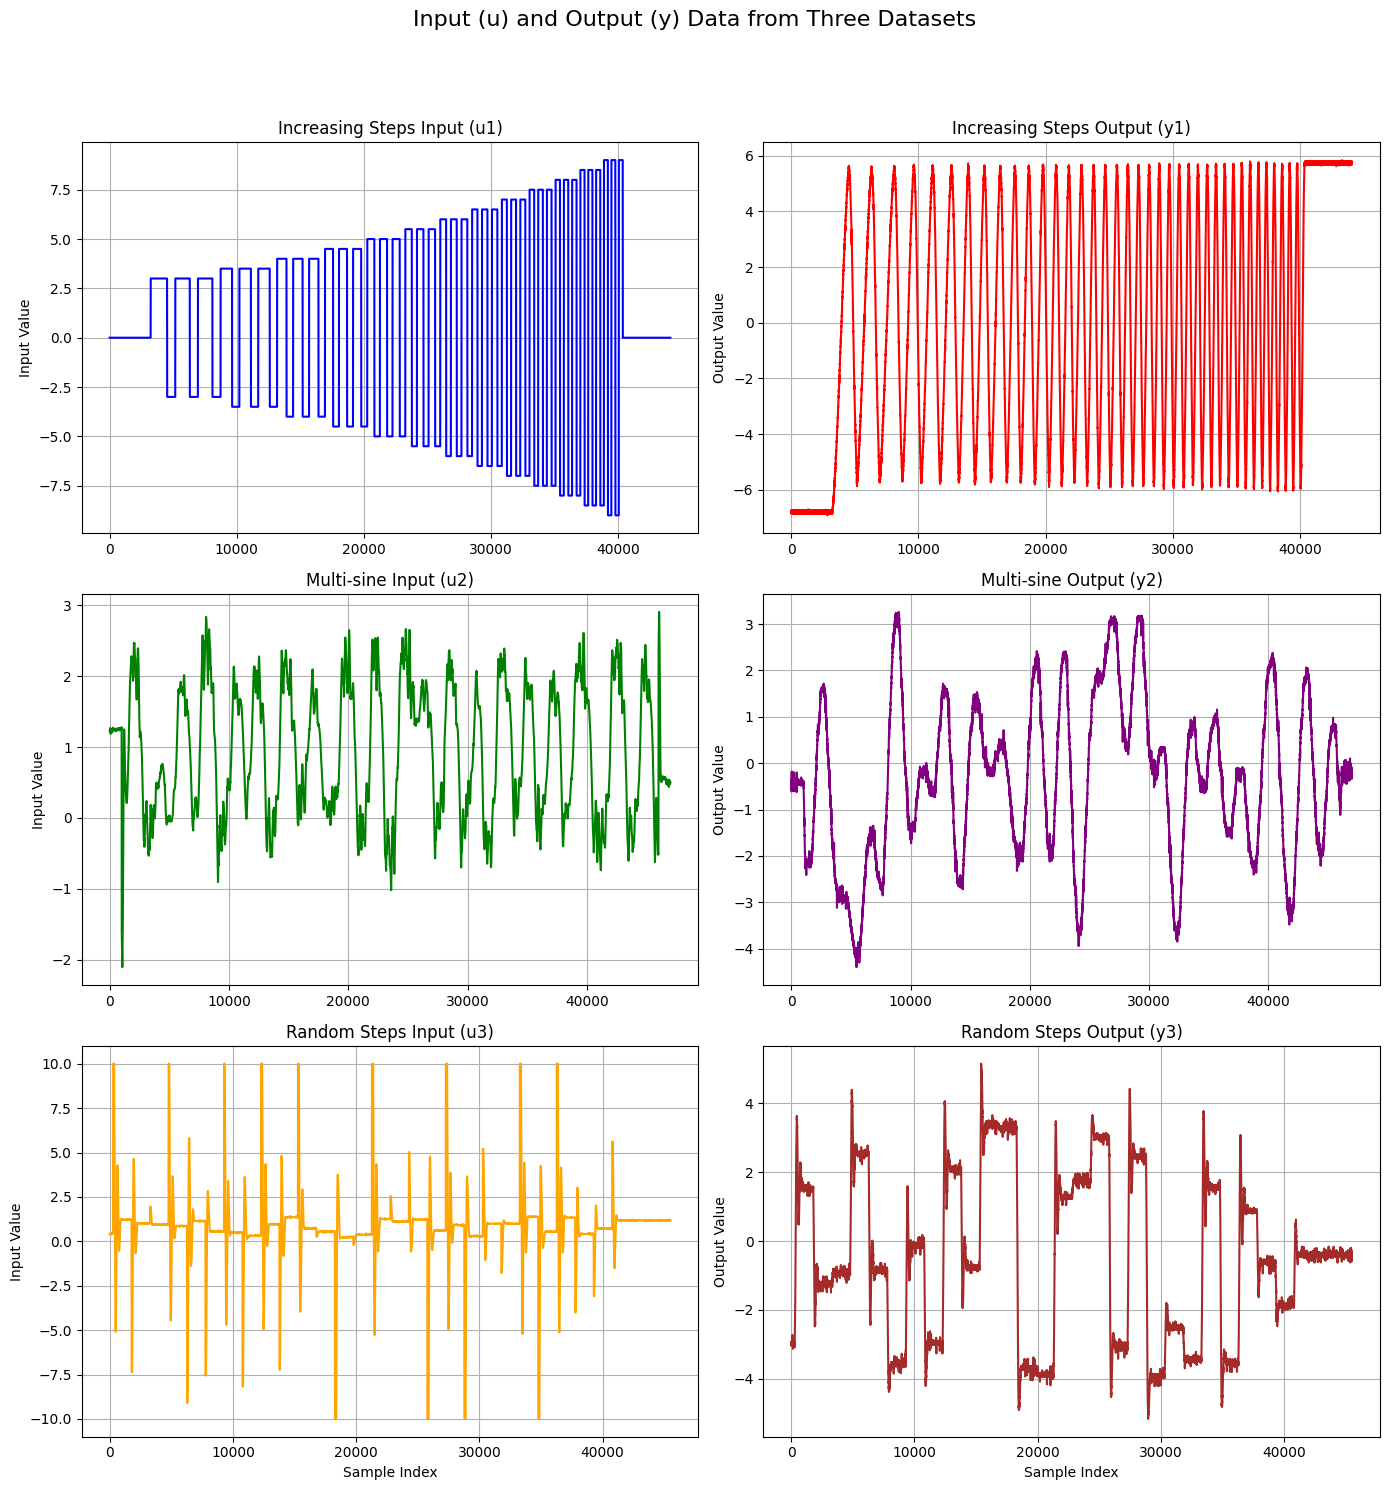

In [22]:
import matplotlib.pyplot as plt

# Create a figure with 3 rows and 2 columns for u and y plots
fig, axes = plt.subplots(3, 2, figsize=(14, 15))
fig.suptitle('Input (u) and Output (y) Data from Three Datasets', fontsize=16, y=1.02)

# Plot u1 and y1 (Increasing Steps Data)
axes[0, 0].plot(u1, label='u1 (Increasing Steps Input)', color='blue')
axes[0, 0].set_title('Increasing Steps Input (u1)')
axes[0, 0].set_ylabel('Input Value')
axes[0, 0].grid(True)

axes[0, 1].plot(y1, label='y1 (Increasing Steps Output)', color='red')
axes[0, 1].set_title('Increasing Steps Output (y1)')
axes[0, 1].set_ylabel('Output Value')
axes[0, 1].grid(True)

# Plot u2 and y2 (Multi-sine Data)
axes[1, 0].plot(u2, label='u2 (Multi-sine Input)', color='green')
axes[1, 0].set_title('Multi-sine Input (u2)')
axes[1, 0].set_ylabel('Input Value')
axes[1, 0].grid(True)

axes[1, 1].plot(y2, label='y2 (Multi-sine Output)', color='purple')
axes[1, 1].set_title('Multi-sine Output (y2)')
axes[1, 1].set_ylabel('Output Value')
axes[1, 1].grid(True)

# Plot u3 and y3 (Random Steps Data)
axes[2, 0].plot(u3, label='u3 (Random Steps Input)', color='orange')
axes[2, 0].set_title('Random Steps Input (u3)')
axes[2, 0].set_xlabel('Sample Index')
axes[2, 0].set_ylabel('Input Value')
axes[2, 0].grid(True)

axes[2, 1].plot(y3, label='y3 (Random Steps Output)', color='brown')
axes[2, 1].set_title('Random Steps Output (y3)')
axes[2, 1].set_xlabel('Sample Index')
axes[2, 1].set_ylabel('Output Value')
axes[2, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()
